In [1]:
import scanpy as sc
import os
import pandas as pd
import numpy as np
from anndata import AnnData, read_h5ad
from scipy.stats import pearsonr, norm, ttest_ind, fisher_exact
from statsmodels.stats.multitest import multipletests
import seaborn as sns

import batchglm.api as glm
import diffxpy.api as de


/Users/colleenmclaughlin/opt/anaconda3/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
import warnings
warnings.filterwarnings('ignore')

sc.settings.verbosity = 3             
sc.settings.set_figure_params(dpi=100, dpi_save=600)

In [3]:
ORN_all = read_h5ad('/data/ORN_all_annotated_GH.h5ad')

In [4]:
ORN_all

AnnData object with n_obs × n_vars = 3715 × 15906
    obs: 'all_types', 'stage', 'matched_anno', 'receptor_types', 'MARS_#_stage', 'MARS_matched'

In [5]:
#open DE genes from 24h APF

DE_24h_allgenes_MARS = []
with open('/data/Figure8/24h_ORNs/all_MARS/all_sig_genes_24h_mars.txt') as f:
    for line in f:
        DE_24h_allgenes_MARS.append(line.rstrip())
        
        
DE_24h_allgenes_matched = []
with open('/data/Figure8/24h_ORNs/matched/all_sig_genes_24h_matched.txt') as f:
     for line in f:
        DE_24h_allgenes_matched.append(line.rstrip())
        

In [6]:
#open DE genes from 42h APF

DE_42h_allgenes_MARS = []
with open('/data/Figure8/42h_ORNs/all_MARS/all_sig_genes_42h_mars.txt') as f:
    for item in f:
        DE_42h_allgenes_MARS.append(line.rstrip())


DE_42h_allgenes_matched = []
with open('/data/Figure8/42h_ORNs/matched/all_sig_genes_42h_matched.txt') as f:
       for item in f:
        DE_42h_allgenes_matched.append(line.rstrip())
        

In [7]:
#open common DE genes between 24h and 42h 

shared_mars_TFs = []
with open('/data/Figure8/combined/shared_mars_TFs.txt') as f:
    for line in f:
          shared_mars_TFs.append(line.rstrip())
            
shared_mars_CSMs = []
with open('/data/Figure8/combined/shared_mars_CSMs.txt') as f:
    for line in f:
          shared_mars_CSMs.append(line.rstrip())
            
shared_matched_TFs = []        
with open('/data/Figure8/combined/shared_matched_TFs.txt') as f:
    for line in f:
          shared_matched_TFs.append(line.rstrip())
            
shared_matched_CSMs = []
with open('/data/Figure8/combined/shared_matched_CSMs.txt') as f:
    for line in f:
          shared_matched_CSMs.append(line.rstrip())
            
shared_MARS = []
with open('/data/Figure8/combined/shared_mars.txt') as f:
    for line in f:
          shared_MARS.append(line.rstrip())
            
shared_matched = []
with open('/data/Figure8/combined/shared_matched.txt') as f:
    for line in f:
          shared_matched.append(line.rstrip())

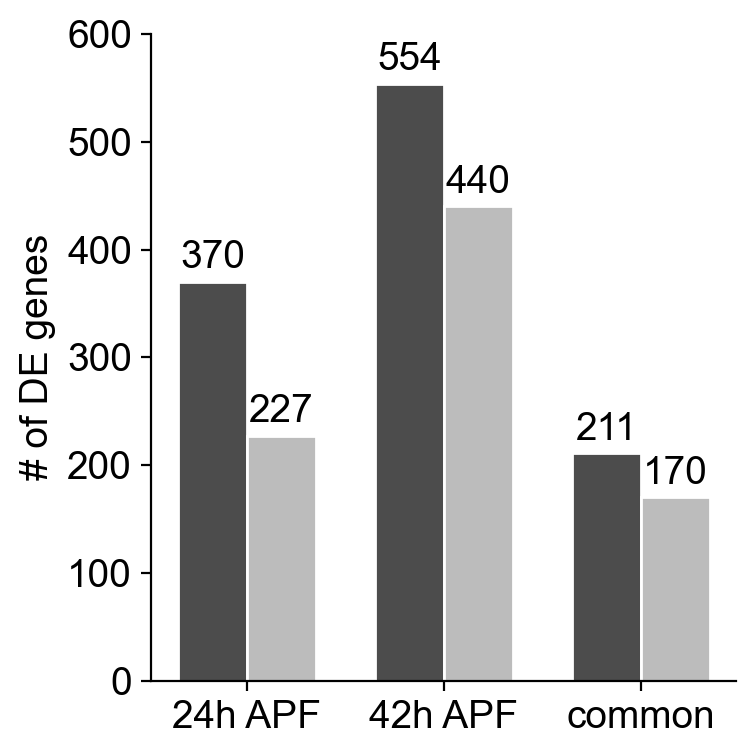

In [8]:
# libraries
import numpy as np
import matplotlib.pyplot as plt

 
#set labels 
labels =  ['24h APF', '42h APF', 'common']
mars = [len(DE_24h_allgenes_MARS), len(DE_42h_allgenes_MARS), len(shared_MARS)]
matched = [len(DE_24h_allgenes_matched),len(DE_42h_allgenes_matched), len(shared_matched)]
    
x = np.arange(len(labels))  # the label locations
width = 0.35  # the width of the bars

#plot
fig, ax = plt.subplots(1, 1, figsize=(4,4))

rects1 = ax.bar(x - width/2, mars, width,color='#4C4C4C',edgecolor='white', label='all RNs')
rects2 = ax.bar(x + width/2, matched, width,color='#BCBCBC', edgecolor='white', label='matched RNs')
 
#plt.bar(rects1, bars1, color='#4C4C4C', width=barWidth, edgecolor='white')
#plt.bar(rects2, bars2, color='#BCBCBC', width=barWidth, edgecolor='white')

 
# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('# of DE genes')
ax.set_ylim(ymax=600,)
ax.set_xticks(x)
ax.set_xticklabels(labels)
plt.grid(b=None)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)


def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 2),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()



In [9]:
#open CSM and TF lists
TFs = []
with open('/resources/TFs.txt') as f:
    for line in f:
           TFs.append(line.rstrip())
CSMs = []
with open('/resources/CSMs.txt') as f:
    for line in f:
           CSMs.append(line.rstrip())

In [10]:
all_genes = 17474
other_all = len(shared_MARS)
other_matched = len(shared_matched)

shared_TFs_all = (len(shared_mars_TFs)/other_all)*100
shared_CSMs_all = (len(shared_mars_CSMs)/other_all)*100
shared_other_all = (100-shared_CSMs_all- shared_TFs_all)


shared_TFs_matched = (len(shared_matched_TFs)/other_matched)*100
shared_CSMs_matched = (len(shared_matched_CSMs)/other_matched)*100 
shared_other_matched = (100-shared_TFs_matched-shared_CSMs_matched)

total_TFs = len(TFs)/all_genes * 100
total_CSMs = len(CSMs)/all_genes * 100
total_genes = (100- total_CSMs-total_TFs)


(<Figure size 504x360 with 1 Axes>,
 <matplotlib.axes._subplots.AxesSubplot at 0x15250ccd0>)

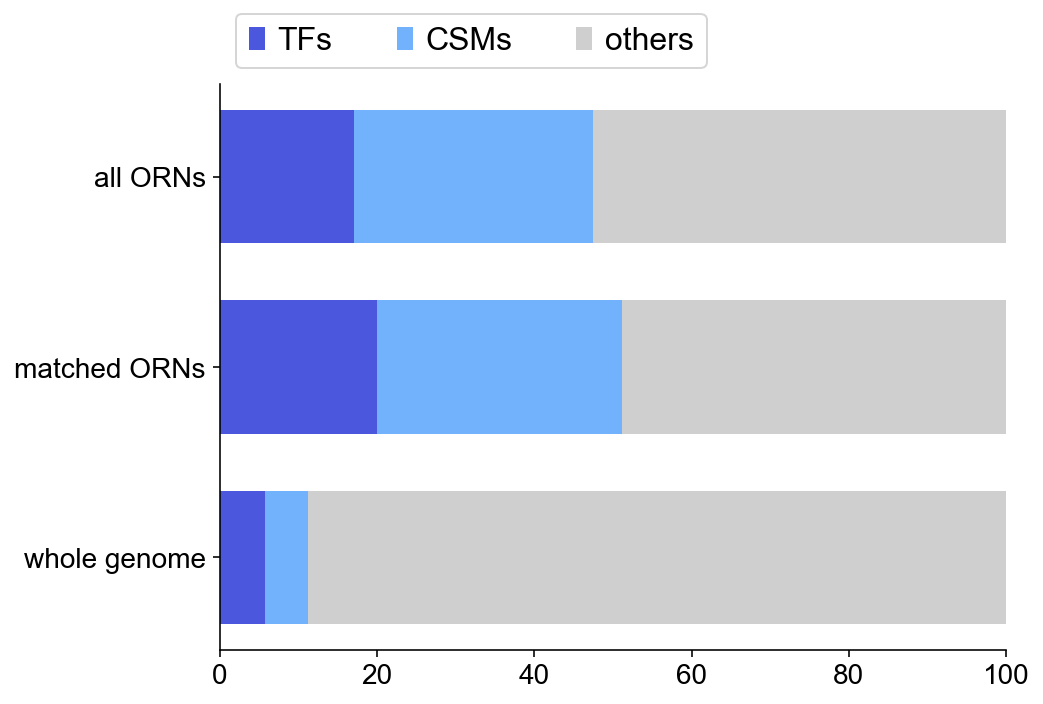

In [11]:
%matplotlib inline
from matplotlib import pyplot as plt
import matplotlib as mpl

category_names = ['TFs','CSMs', 'others']

results = {
    'all ORNs': [shared_TFs_all,shared_CSMs_all,  shared_other_all],
    'matched ORNs': [shared_TFs_matched ,shared_CSMs_matched,  shared_other_matched],
    'whole genome': [total_TFs, total_CSMs,  total_genes] }
colors = ['#4B57DD','#72B2FC',  '#CFCFCF']

def plot(results, category_names):
    labels = list(results.keys())
    data = np.array(list(results.values()))
    data_cum = data.cumsum(axis=1)
    category_colors = colors
    (np.linspace(0.50, 0.50, data.shape[1]))

    fig, ax = plt.subplots(figsize=(7,5))
    ax.invert_yaxis()
    ax.xaxis.set_visible(True)
    ax.set_xlim(0, np.sum(data, axis=1).max())

    for i, (colname, color) in enumerate(zip(category_names, category_colors)):
        widths = data[:, i]
        starts = data_cum[:, i] - widths
        ax.barh(labels, widths, left=starts, height=0.7,
                label=colname, color=color)
        xcenters = starts + widths / 2

       
    ax.legend(ncol=len(category_names), bbox_to_anchor=(0, 1),
              loc='lower left', fontsize=16)
    plt.grid(b=None)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    
    return fig, ax
    
plot(results, category_names)

In [12]:
print('%shared TFs all:'), shared_TFs_all, print('% shared CSMs all:'), shared_CSMs_all, print('shared TFs matched:'),shared_TFs_matched, print('shared CSMs matched:'), shared_CSMs_matched

%shared TFs all:
% shared CSMs all:
shared TFs matched:
shared CSMs matched:


(None,
 17.061611374407583,
 None,
 30.33175355450237,
 None,
 20.0,
 None,
 31.176470588235293)

In [13]:
ORN_all.obs['dev_dotplot'] = ORN_all.obs['MARS_matched']

In [14]:
ORN_24_42 = ORN_all[(ORN_all.obs.stage != 'adult')]

In [15]:
ORN_24_42.obs['dev_dotplot'] = ORN_24_42.obs['dev_dotplot'].map(lambda x: x.rstrip('*'))


Trying to set attribute `.obs` of view, copying.


In [16]:
ORN_24_42.obs.matched_type_with_stage = ORN_24_42.obs['dev_dotplot'].str.cat(ORN_24_42.obs['stage'], sep='_')
ORN_24_42.obs['type_stage'] = ORN_24_42.obs.matched_type_with_stage.astype('category')

In [17]:
ORN_24_42.obs.type_stage.cat.rename_categories({'VM5d_24h' : 'VM5d/v_24h'}, inplace=True)

In [18]:
i = ['DA1_24h', 'DA1_42h', 'DA4l_24h', 'DA4l_42h',  'DC3_24h',
       'DC3_42h', 'DL3_24h', 'DL3_42h', 'DL4_24h', 'DL4_42h', 'DL5_24h',
       'DL5_42h', 'DM1_24h', 'DM1_42h', 'DM2_24h', 'DM2_42h', 'DM3_24h',
       'DM3_42h', 'DM4_24h', 'DM4_42h', 'DP1l_24h', 'DP1l_42h', 'VA1d_24h', 'VA1d_42h', 'VA1v_24h', 'VA1v_42h', 'VA2_24h',
       'VA2_42h', 'VC3_24h', 'VC3_42h', 'VL1_24h', 'VL1_42h', 'VL2a_24h',
       'VL2a_42h', 'VM3_24h', 'VM3_42h', 'VM4_24h', 'VM4_42h', 'VM5d/v_24h',
       'VM5d_42h', 'VM5v_42h', 'V_24h', 'V_42h']
ORN_dotplot = ORN_24_42[(ORN_24_42.obs.type_stage.isin(i))]

In [19]:
ORN_dotplot.obs.type_stage.cat.reorder_categories(['DA1_24h', 'DA1_42h','DC3_24h','DC3_42h', 'DA4l_24h', 'DA4l_42h',
                                                      'DL3_24h', 'DL3_42h','VA1d_24h', 'VA1d_42h', 'VA1v_24h', 'VA1v_42h',
                                                     'DM1_24h', 'DM1_42h', 'DM2_24h', 'DM2_42h','DM4_24h', 'DM4_42h',
                                                     'V_24h', 'V_42h', 'VA2_24h', 'VA2_42h', 'VM5d/v_24h','VM5d_42h', 'VM5v_42h', 'DL4_24h', 'DL4_42h', 'DL5_24h','DL5_42h',
                                                      'DM3_24h', 'DM3_42h','VM3_24h','VM3_42h', 'DP1l_24h', 'DP1l_42h', 'VC3_24h',
                                                     'VC3_42h','VL1_24h', 'VL1_42h', 'VL2a_24h', 'VL2a_42h','VM4_24h', 'VM4_42h'], inplace=True)

In [20]:
sorted_CSMs = sorted(shared_matched_CSMs , key=str.casefold)
sorted_TFs = sorted(shared_matched_TFs, key=str.casefold)

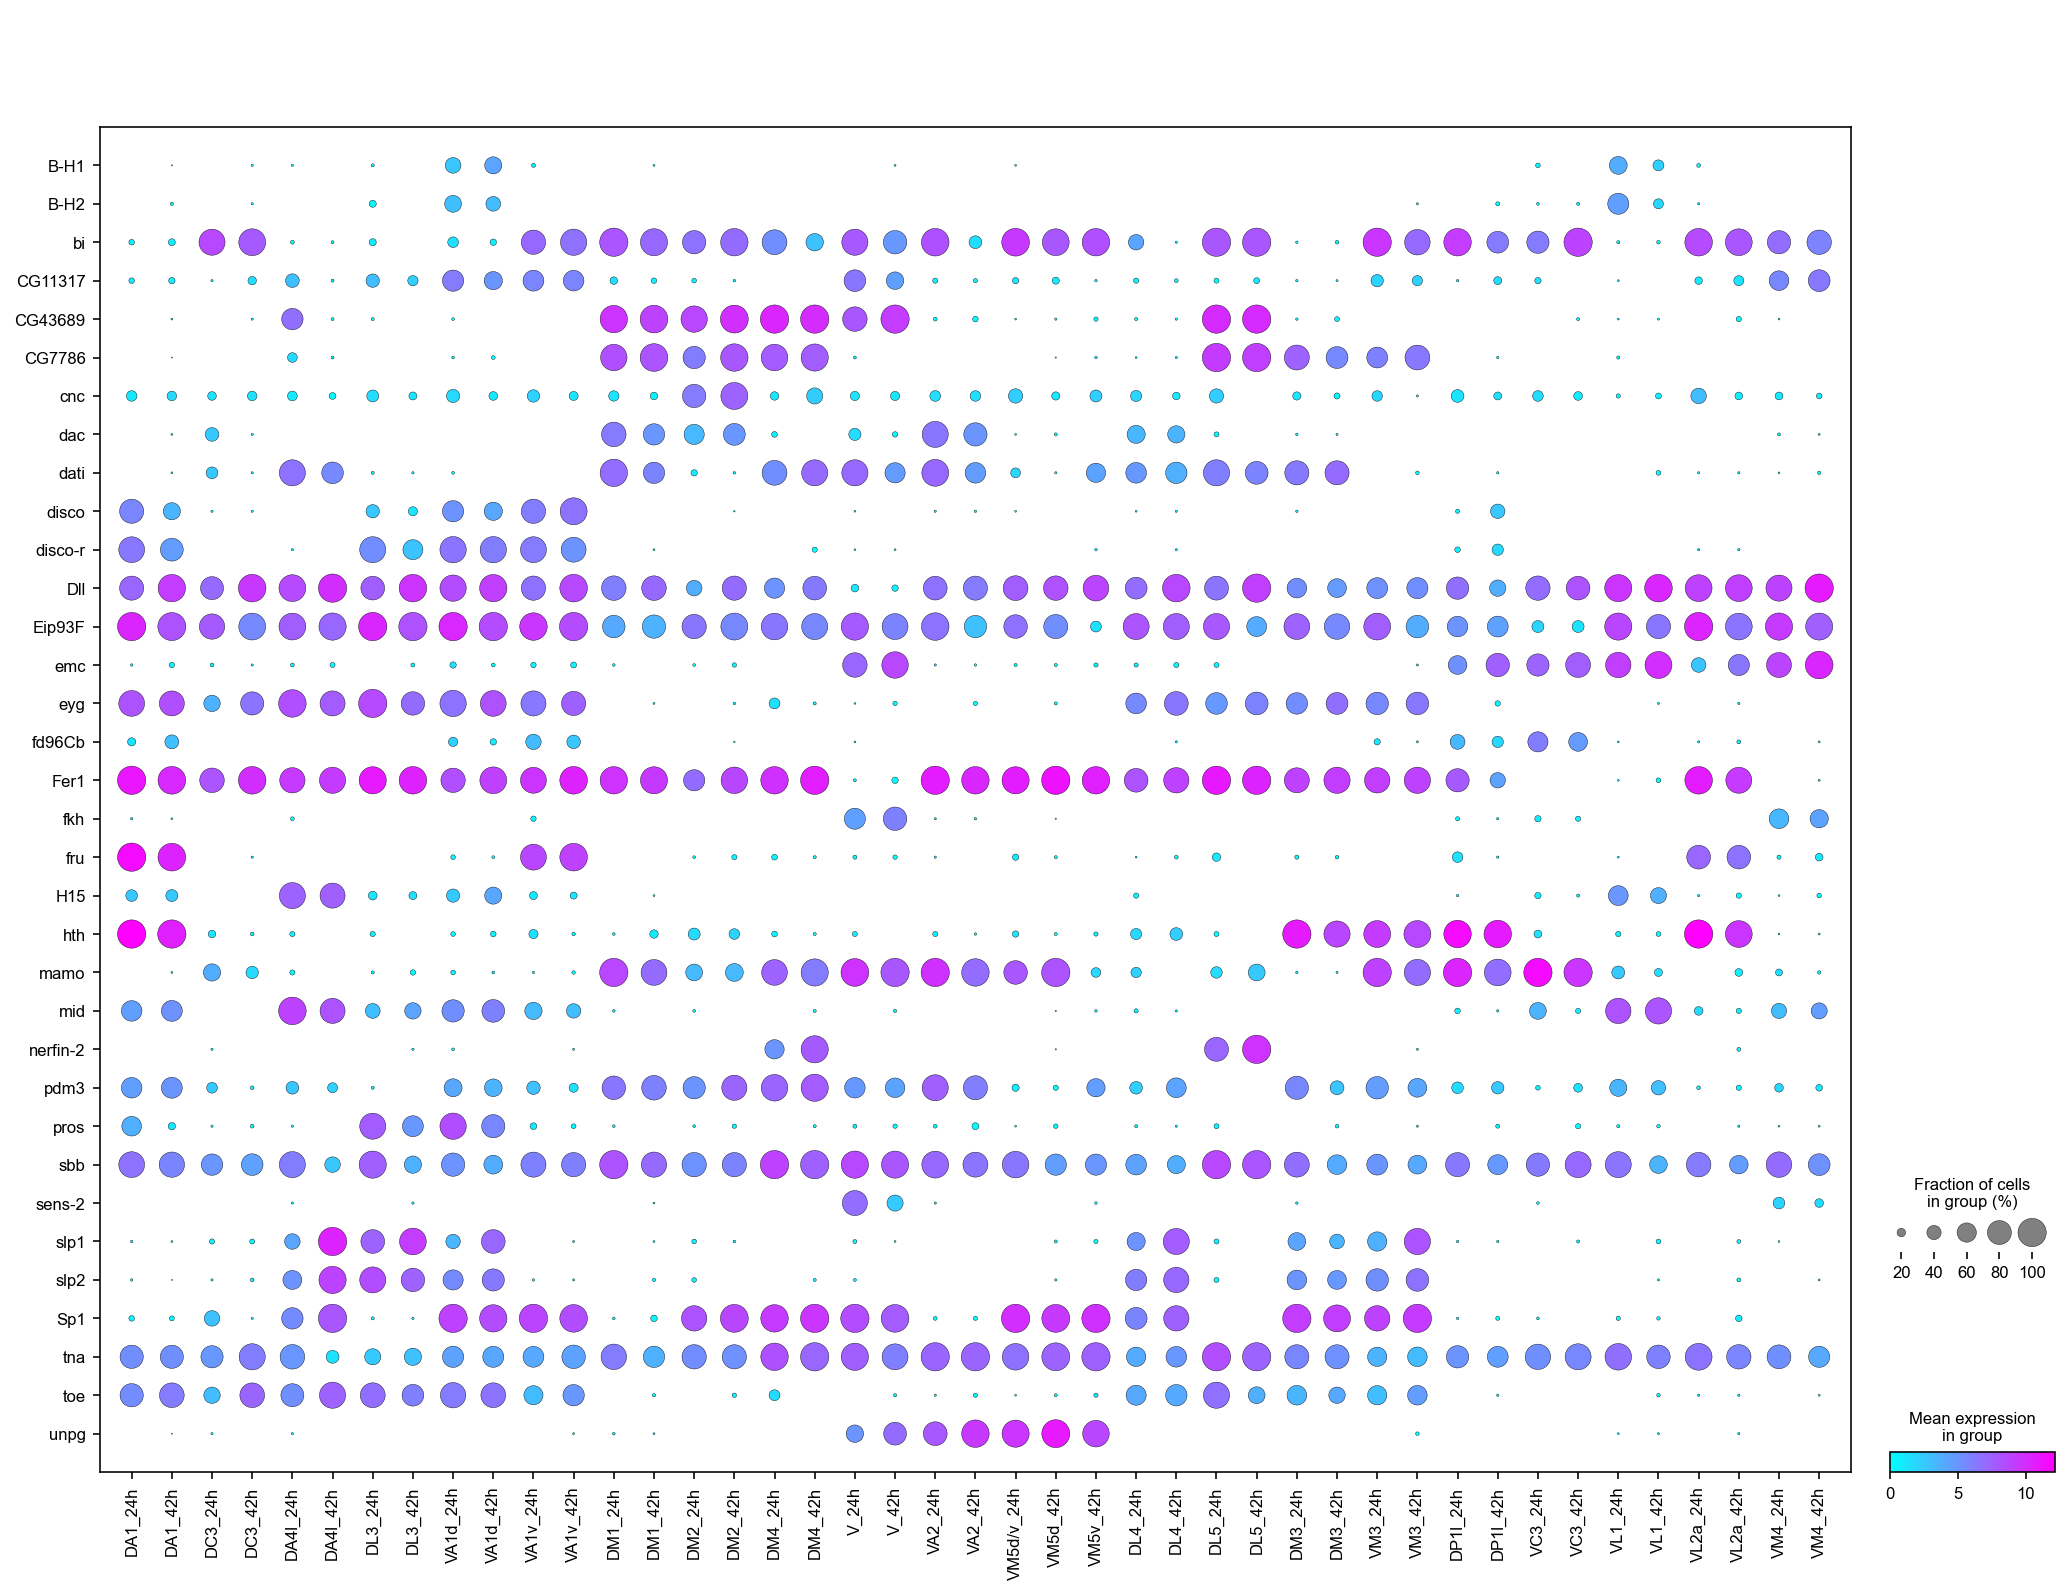

In [21]:
sc.pl.dotplot(ORN_dotplot, sorted_TFs , groupby='type_stage', color_map='cool', swap_axes = True)

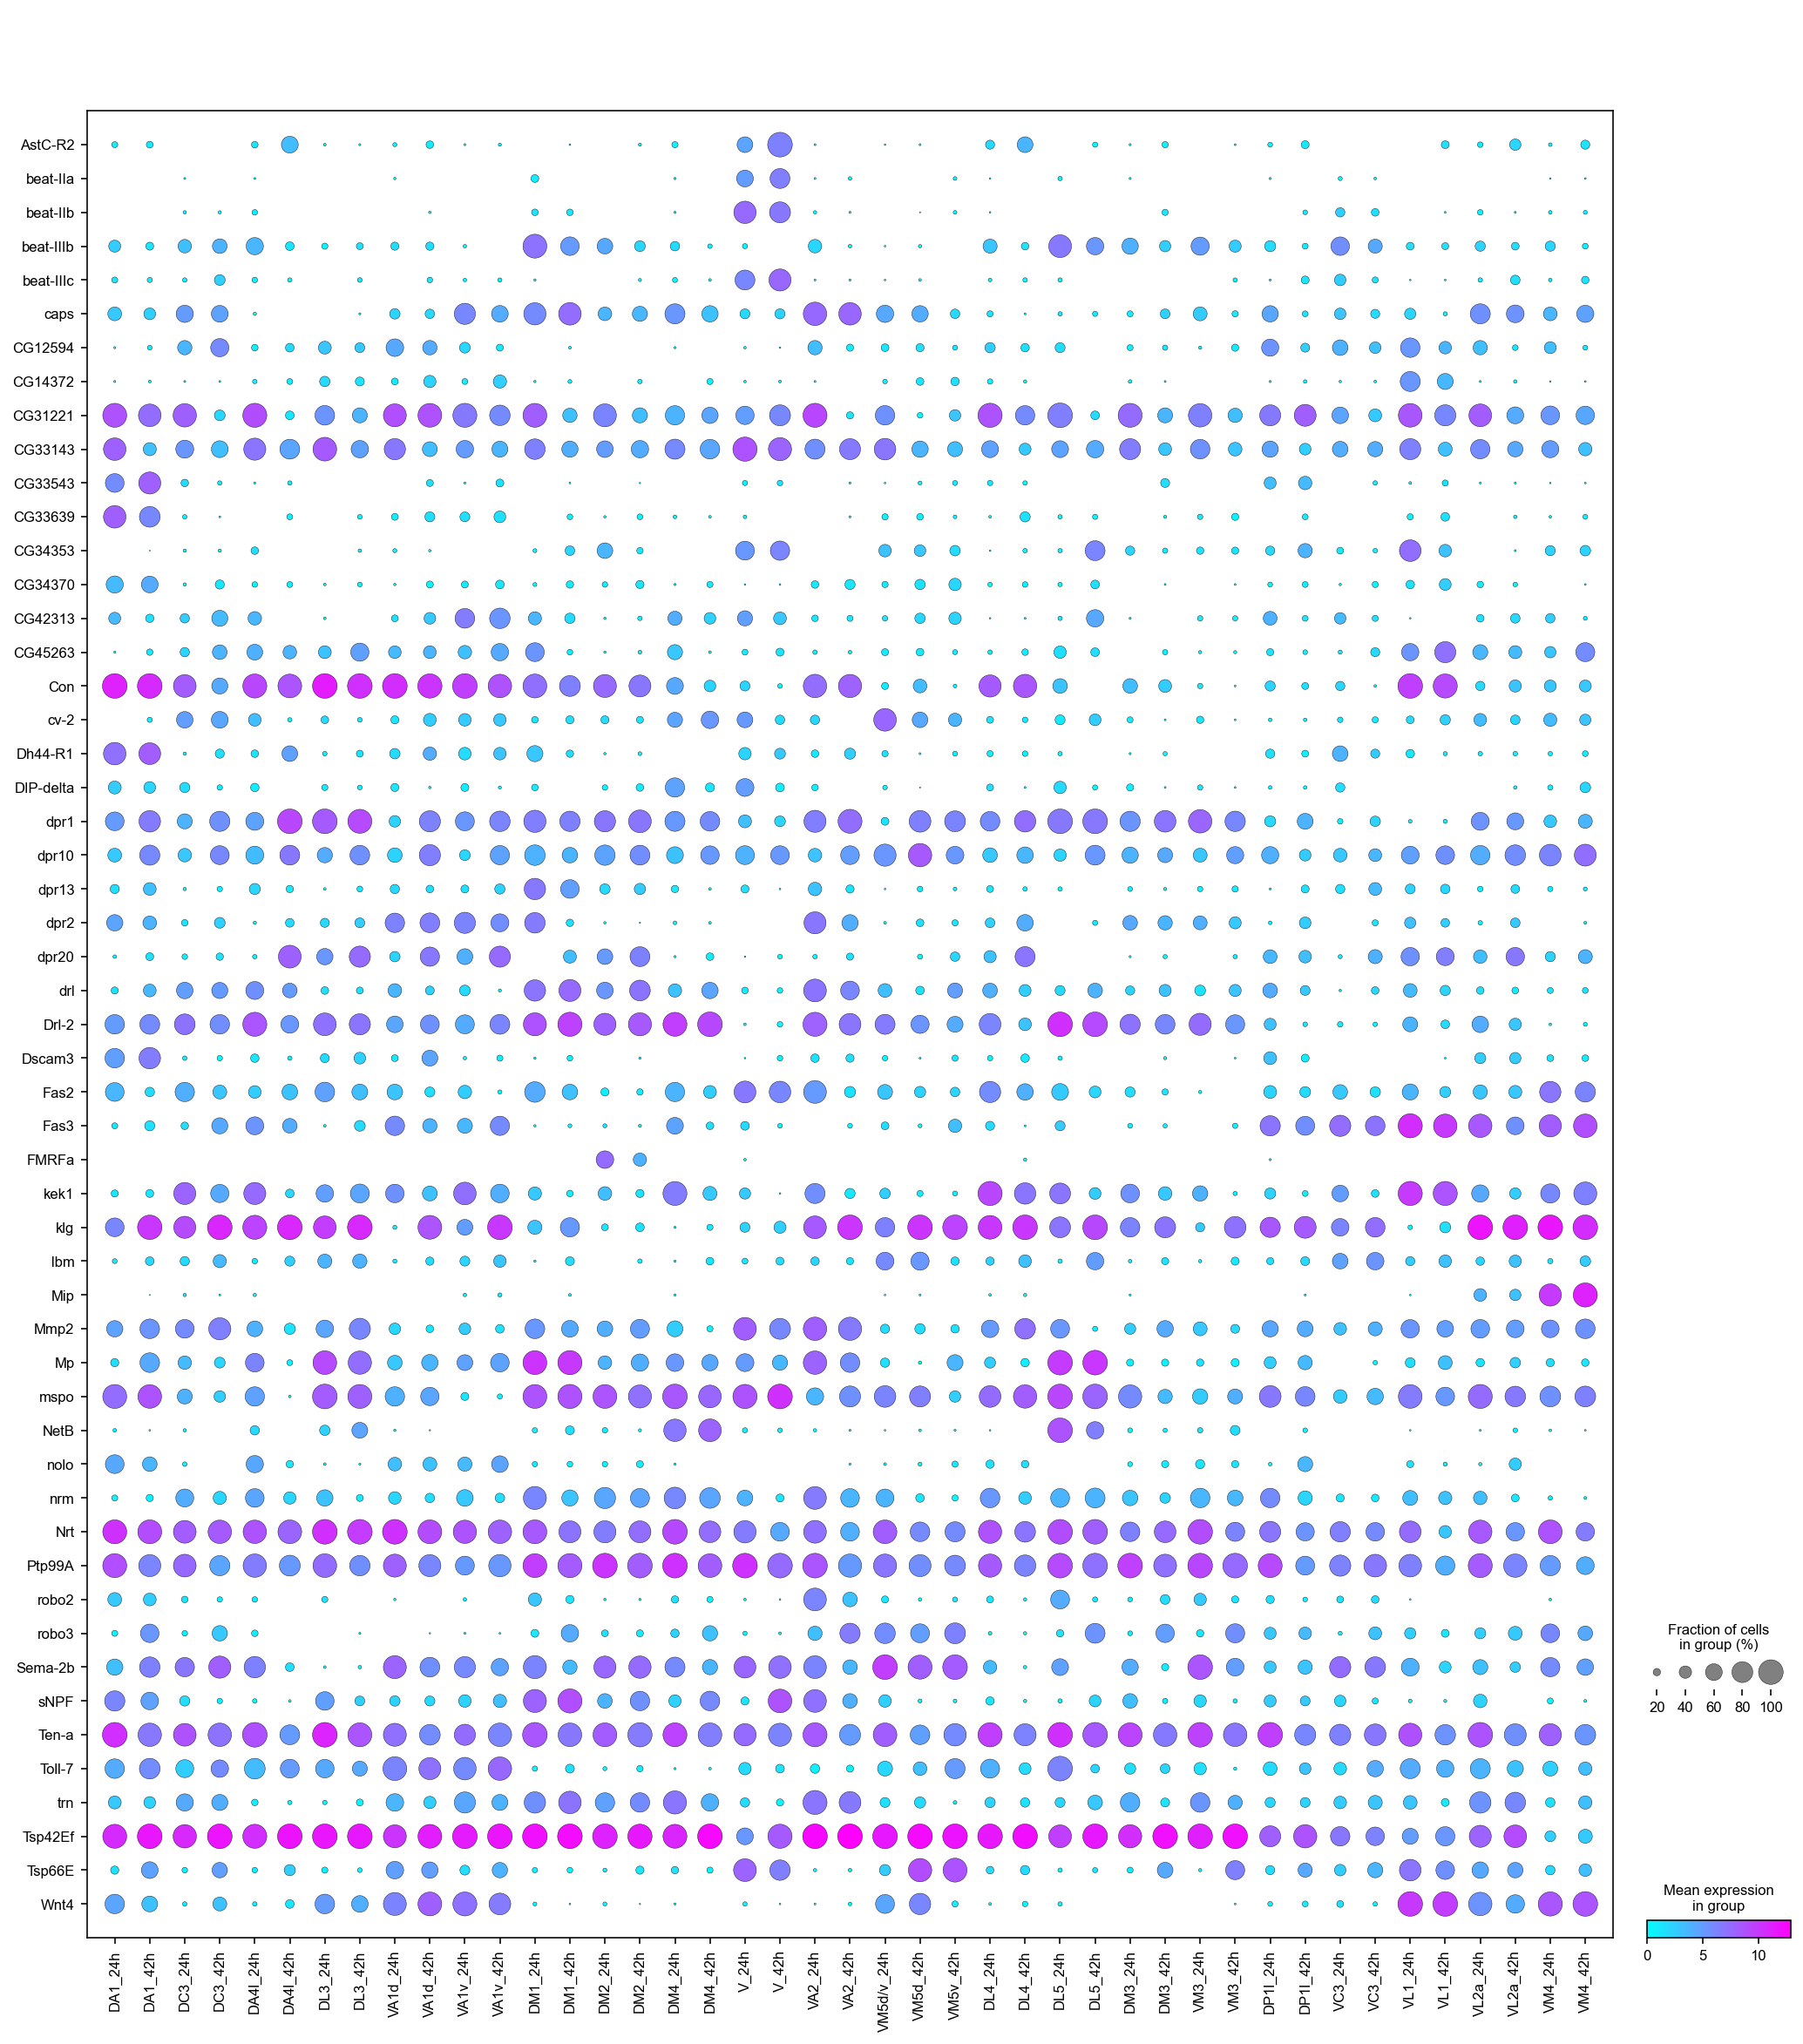

In [22]:
sc.pl.dotplot(ORN_dotplot, sorted_CSMs , groupby='type_stage', color_map='cool', swap_axes = True)

In [23]:
# open all CSMs and TFs at either stage

all_CSMs = []
with open('/data/Figure8/combined/all_24_42_CSMs_matched.txt') as f:
    for line in f:
        all_CSMs.append(line.rstrip())

all_TFs = []
with open('/data/Figure8/combined/all_24_42_TFs_matched.txt') as f:
    for line in f:
        all_TFs.append(line.rstrip())

In [24]:
all_CSMs = sorted(all_CSMs, key=str.casefold)
all_TFs = sorted(all_TFs, key=str.casefold)

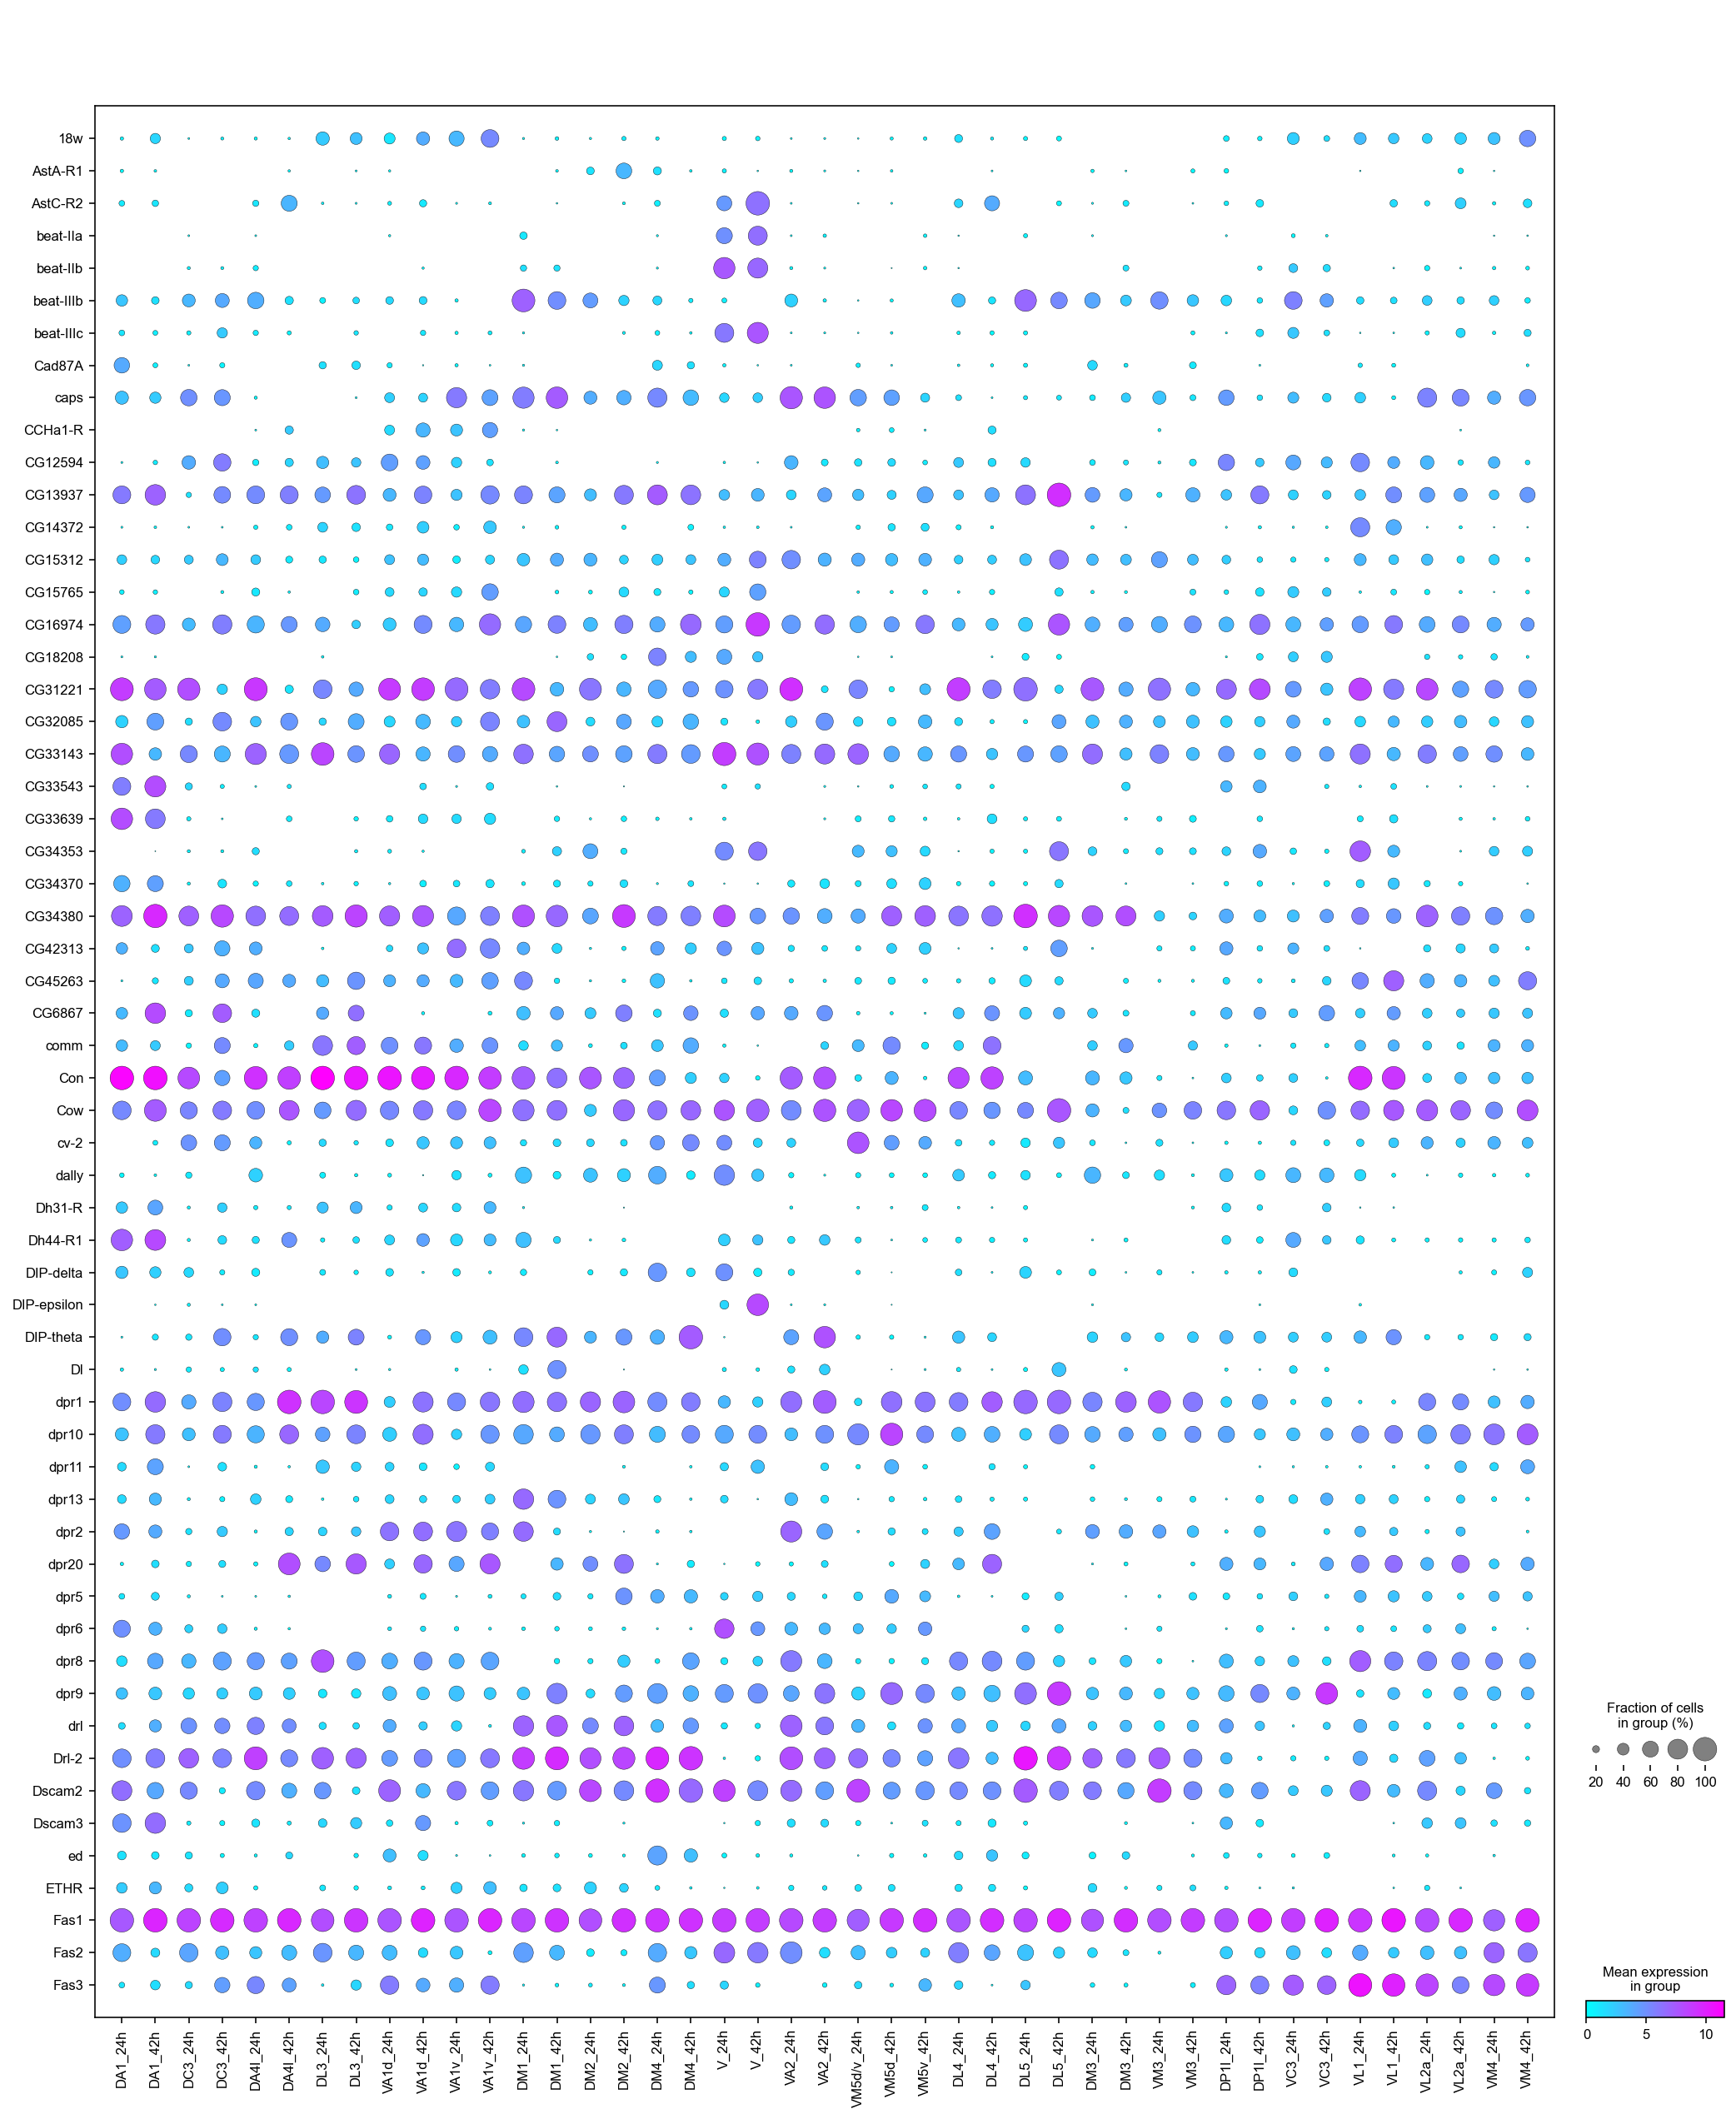

In [25]:
sc.pl.dotplot(ORN_dotplot, all_CSMs[:58] , groupby='type_stage', color_map='cool', swap_axes = True)

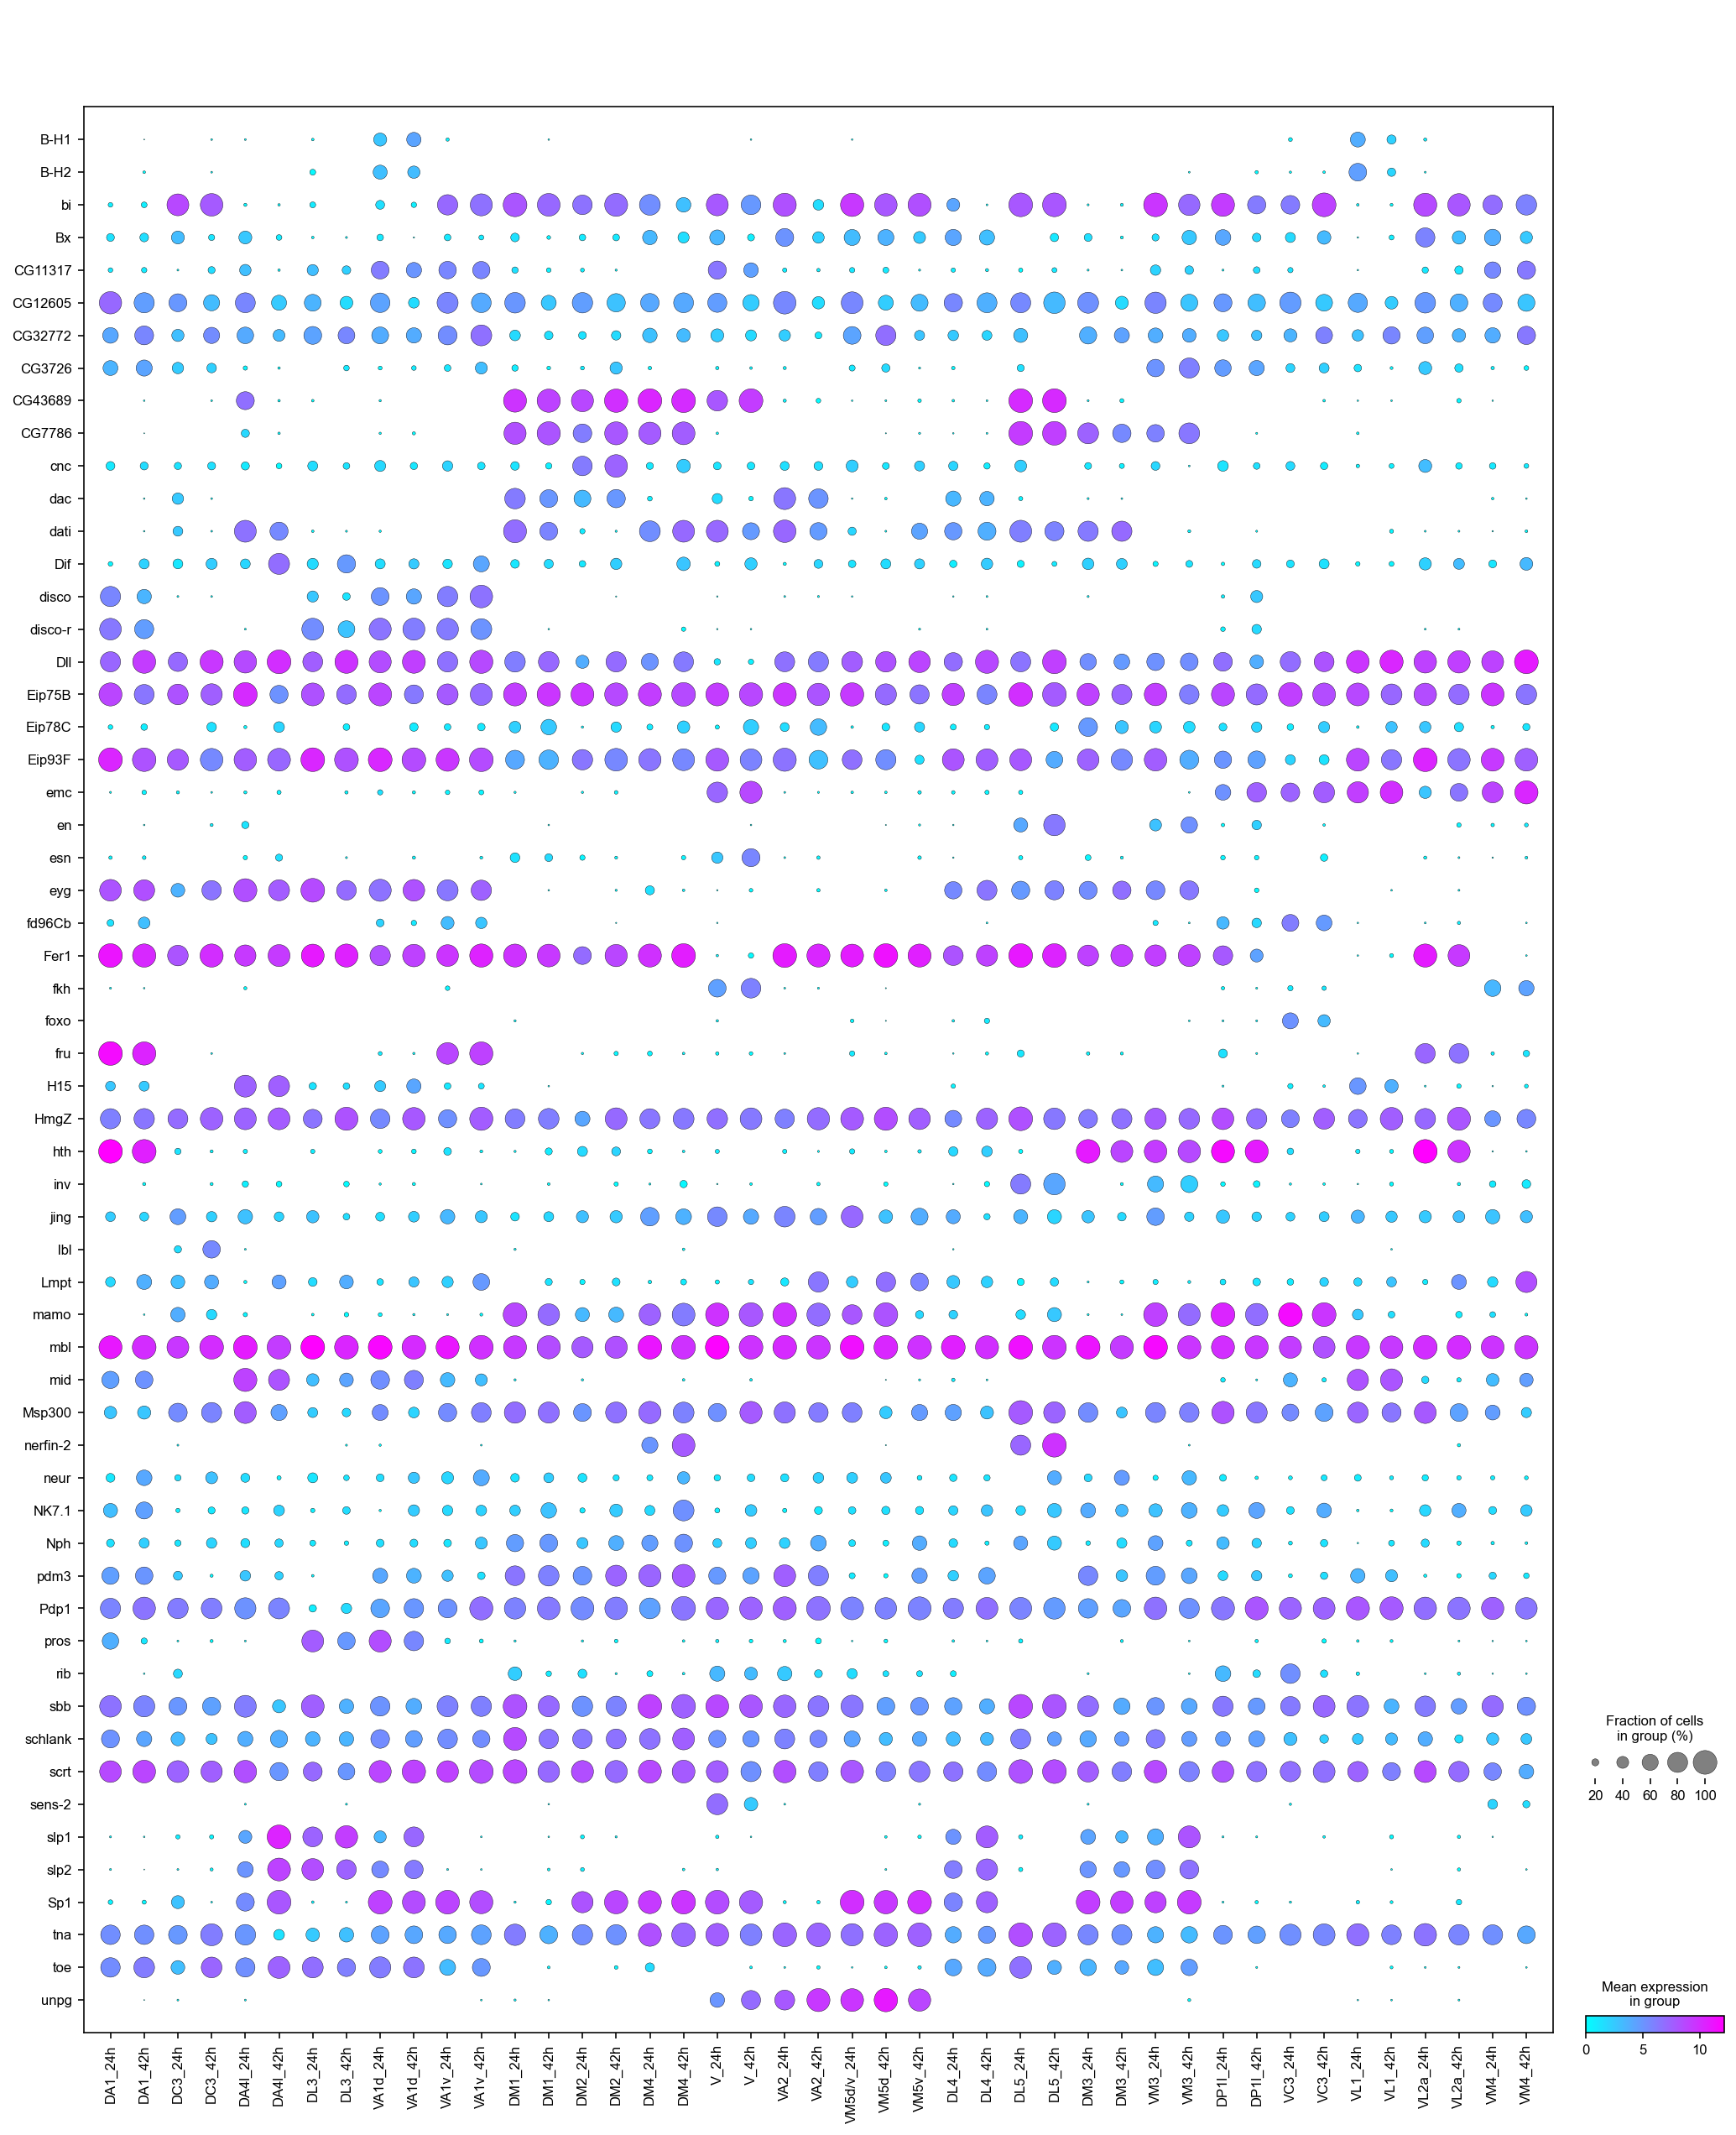

In [26]:
sc.pl.dotplot(ORN_dotplot, all_TFs , groupby='type_stage', color_map='cool', swap_axes = True)